# Logistic regression

- This tutorial aims to explain the binary classification model, a logistic regression, and understand the mathematical concepts behind the algorithm.

### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

### Understand odds ratio and sigmoid function

- Simply, odds is a probability where a certain event occurs. Odds ratio can be written as ${p \over 1-p}$ where p is the probablity of positive sample (positive sample refers to a certain event or class eg. $y = 1$). 


- Logit function can be defined by taking logarithm to the odds ratio: 

    $logit(p) = log{p \over 1-p}$


- The linear relationship between $z$ (summation of features times weights) and logit function is formulated: 

    $logit(p(y=1|x) = w_0x_0 + w_1x_1 + ... + w_mx_m = z = \sum_{i=0}^m w_i x_i = w^Tx$


- The inverse of the logit function is the sigmoid function. 

    $\phi (z) = {1 \over 1 + e^-z}$ where $z = w_0x_0 + w_1x_1 + ... + w_mx_m = w^Tx$

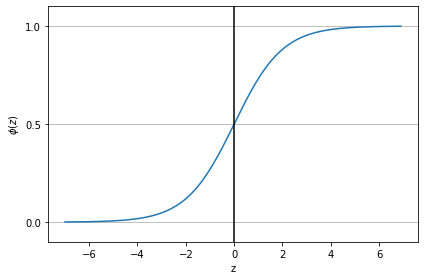

In [2]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim((-0.1, 1.1))
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

### Loss function of logistic regression

- The loss (cost) function of logistic regression is **log loss**, which is derived from **log likelihood function**. 

    $J(w) = \sum_{i=1}^n [-y^i log(\phi(z^i))-(1-y^i)log(1-\phi(z^i))]$ for binary classification $y = {0, 1}$
    
    
- Below graph (log loss vs. sigmoid activation) shows that the cost of prediction rises to infinity when the model misses (eg. predict 1 when y = 0 or vice versa) and drops to 0 when the model gets correct label.

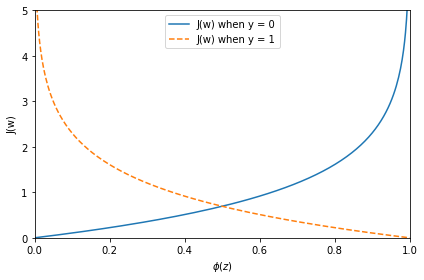

In [3]:
def loss_0(z):
    return -np.log(1-sigmoid(z))

def loss_1(z):
    return -np.log(sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
l_0 = [loss_0(l) for l in z]
plt.plot(phi_z, l_0, label='J(w) when y = 0')
l_1 = [loss_1(l) for l in z]
plt.plot(phi_z, l_1, label='J(w) when y = 1', linestyle='--')
plt.xlim((0, 1))
plt.ylim((0, 5))
plt.xlabel('$\phi (z)$')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Train a logistic regression model using scikit-learn API

In [4]:
def display_decision_boundary(X, y, classifier, test_idx=None, step=0.02):
    markers = ('o', 'x', 's', '^', 'v')
    colors = ['red', 'blue', 'green', 'yellow', 'gray']
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # display a decision boundary
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()
    # cdts is a short-form of coordinates
    # np.meshgrid returns coordinate matrices from coordinate vectors
    x1_cdts, x2_cdts = np.meshgrid(np.arange(x1_min-1, x1_max+1, step), np.arange(x2_min-1, x2_max+1, step))
    Z = classifier.predict(np.array([x1_cdts.ravel(), x2_cdts.ravel()]).T) # transpose an array using .T
    Z = Z.reshape(x1_cdts.shape)
    plt.contourf(x1_cdts, x2_cdts, Z, alpha=0.3, cmap=cmap)
    plt.xlim(x1_cdts.min(), x1_cdts.max())
    plt.ylim(x2_cdts.min(), x2_cdts.max())

    labels = {0:'setosa', 1:'versicolor', 2:'virginica'}
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1], # use of boolean masks
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=labels[cl],
        )
    
    # plot test data differently; use circle
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(x=X_test[:, 0],
                    y=X_test[:, 1],
                    facecolor='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test'
                   )

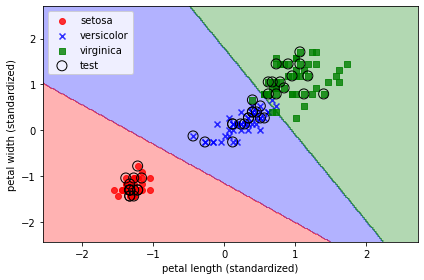

In [5]:
# load iris flowers dataset
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

# split training and test dataset randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# standardize each feature
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# train a logistic regression model
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

# display a decision boundary
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
display_decision_boundary(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length (standardized)')
plt.ylabel('petal width (standardized)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [6]:
print('Test accuracy: {:.3f}'.format(lr.score(X_test_std, y_test)))

Test accuracy: 0.978
